In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
dtypes = {"date": "str"}
parse_dates = ["date"]
df = pd.read_csv("covidsg.csv", dtype=dtypes, parse_dates=parse_dates)
df.head()

,case,date,type,race,age,gender,hospital
0,#1114,2020-04-03,Local,Singapore Citizen,28,M,CGH
1,#1113,2020-04-03,Local,Bangladeshi (Singapore Work Pass holder),42,M,NTFGH
2,#1112,2020-04-03,Local,Burmese (Long Term Pass holder),32,M,KTPH
3,#1111,2020-04-03,Local,Burmese (Long Term Pass holder),29,M,KTPH
4,#1110,2020-04-03,Local,Bangladeshi (Long Term Pass holder),27,M,KTPH


## Breakdown of Cases

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

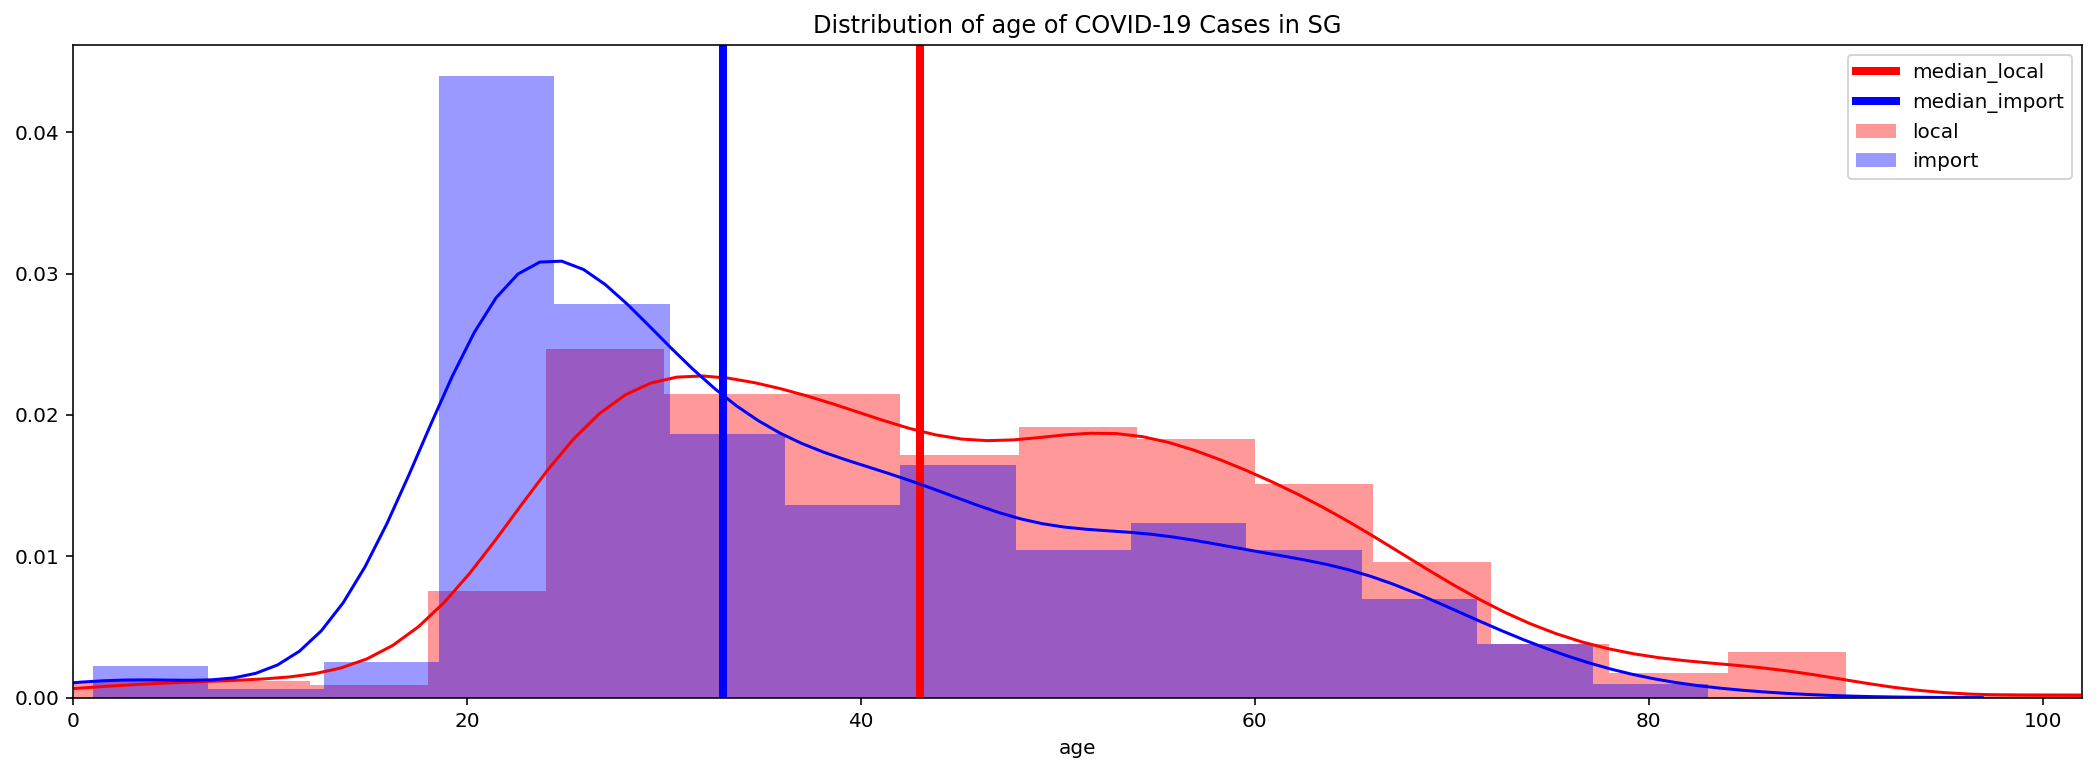

In [3]:
plt.clf()
plt.figure(figsize=(18,6))
plt.legend()
plt.title("Distribution of age of COVID-19 Cases in SG")
df_local = df[df["type"]=="Local"]
plt.axvline(np.median(df_local["age"]), label="median_local", c="r", linewidth=4)
sns.distplot(df_local["age"], label="local", color="r")
df_import = df[df["type"]=="Imported"]
plt.axvline(np.median(df_import["age"]), label="median_import", c="b", linewidth=4)
sns.distplot(df_import["age"], label="import", color="b")
plt.xlim(0, 102)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

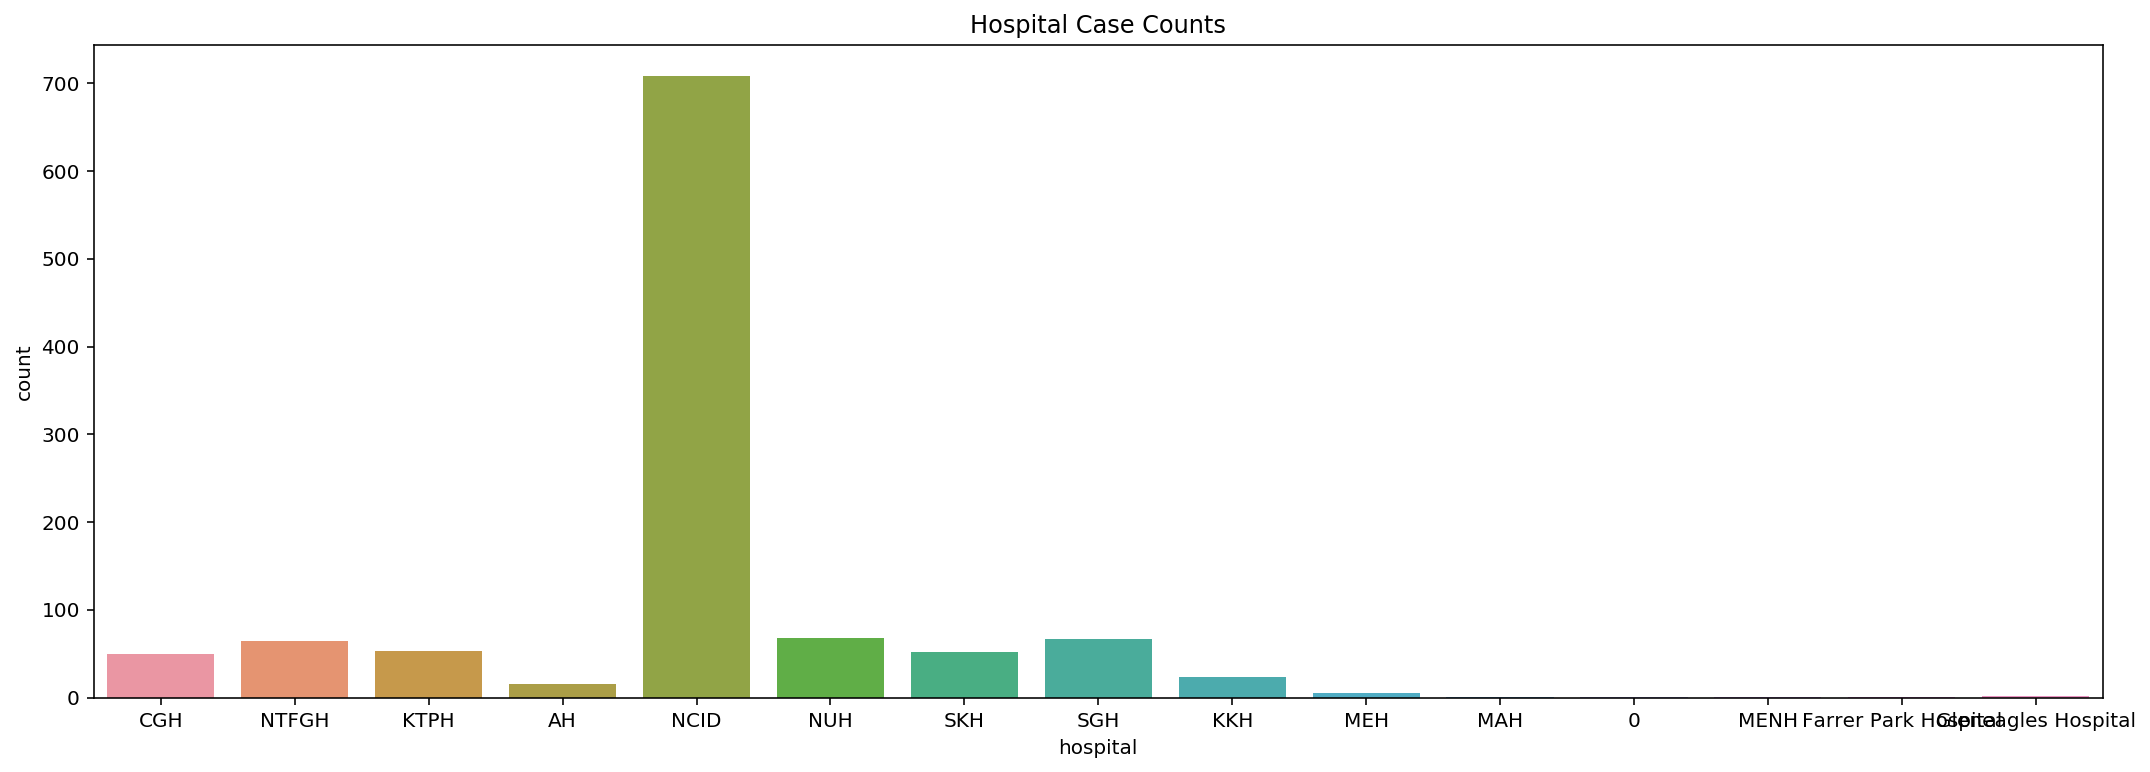

In [4]:
plt.clf()
plt.figure(figsize=(18,6))
plt.title("Hospital Case Counts")
sns.countplot(df["hospital"])
plt.show()

<Figure size 432x288 with 0 Axes>

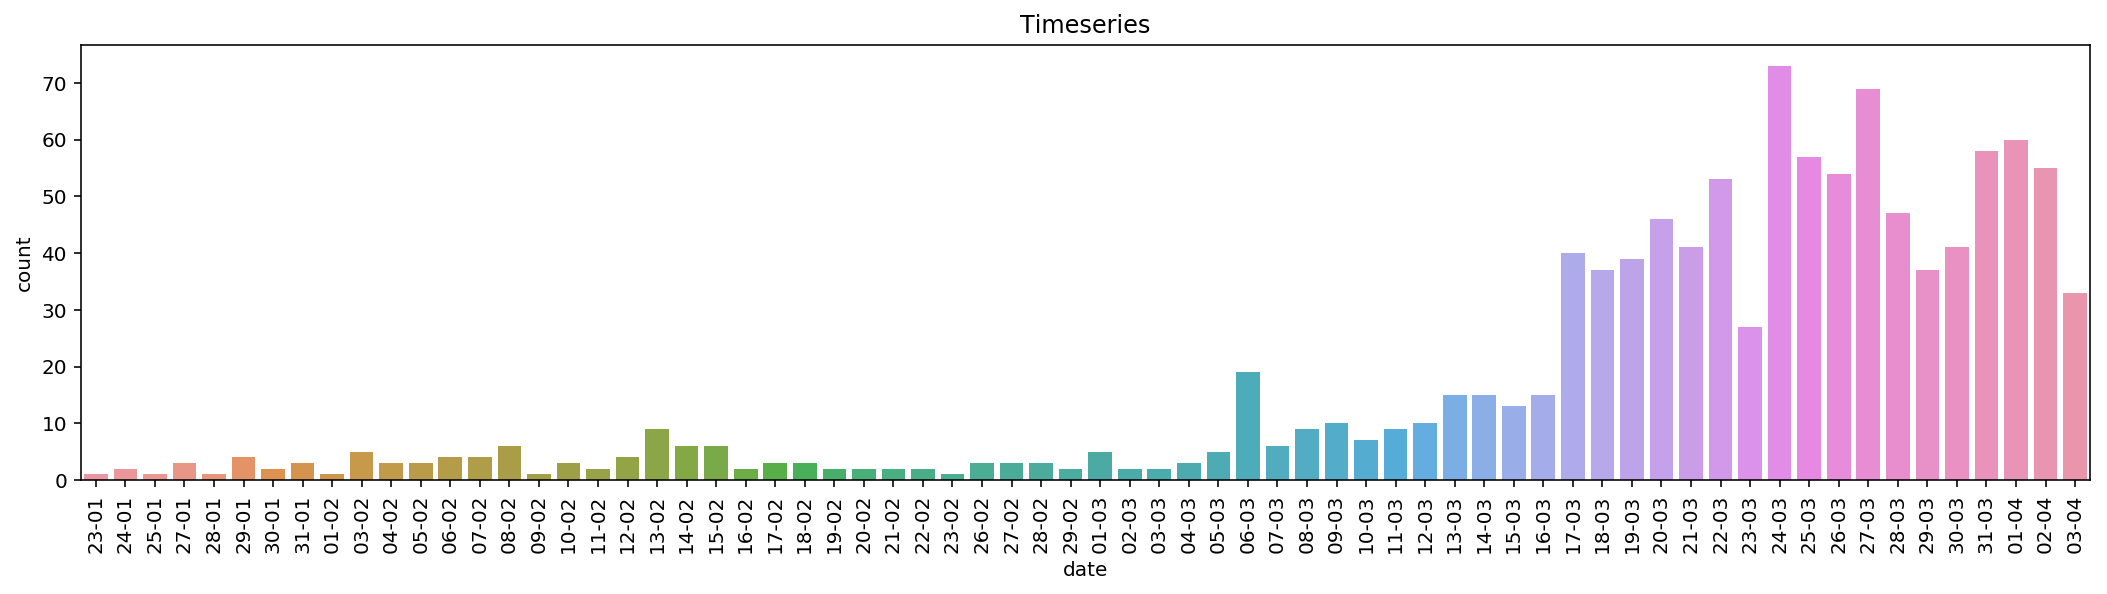

In [5]:
plt.clf()
plt.figure(figsize=(18,4))
plt.title("Timeseries")
sns.countplot(pd.to_datetime(df["date"]).dt.strftime('%d-%m')[::-1])
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

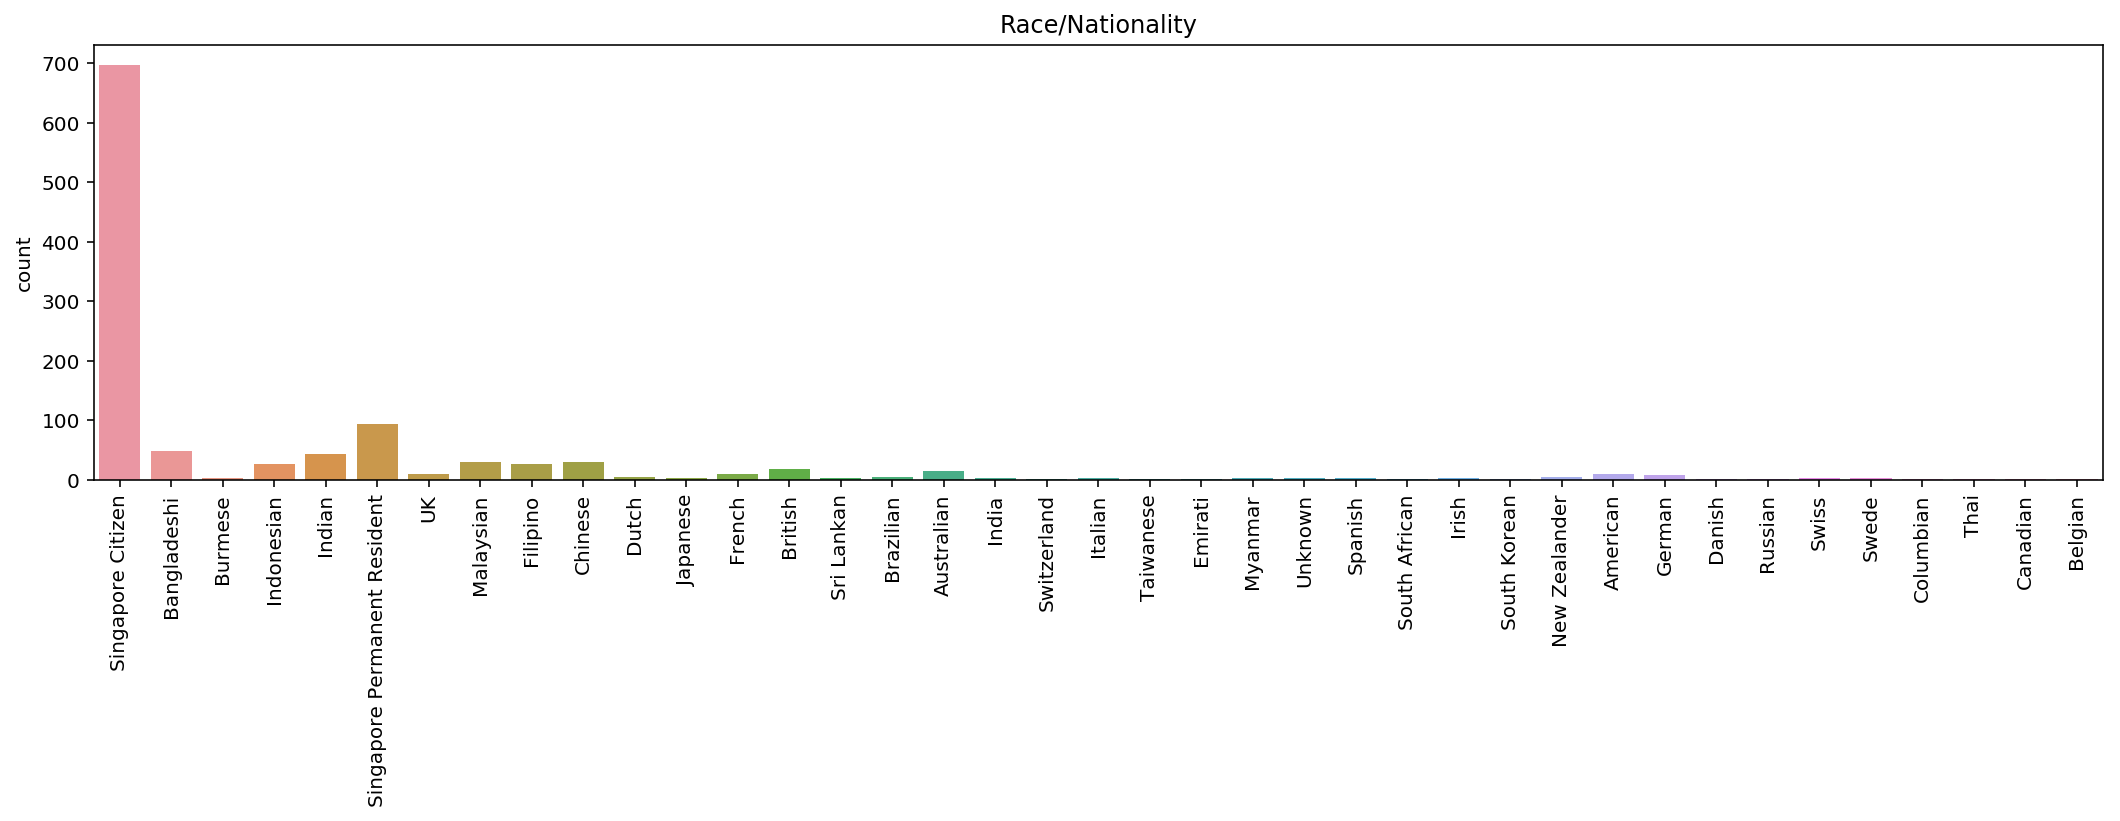

In [6]:
plt.clf()
plt.figure(figsize=(18,4))
plt.title("Race/Nationality")
cleaned_race = [case.split(" (")[0].replace("0", "Unknown") for case in df["race"]]
sns.countplot(cleaned_race)
plt.xticks(rotation=90)
plt.show()